In [2]:
import pandas as pd
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

In [24]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [51]:
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4,4,4,1,...,2,3,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4,4,4,2,...,1,3,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4,4,4,2,...,2,3,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4,4,4,2,...,2,3,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4,4,4,1,...,5,3,0,0,0,0,0,0,0,0


In [53]:
test_attr = test.ix[:, 5:]
test_attr.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,1,4,4,4,1,2,5,4,5,5,...,2,3,0,0,0,0,0,0,0,0
1,3,4,4,4,2,2,5,3,4,4,...,1,3,0,0,0,0,0,0,0,0
2,3,4,4,4,2,2,5,4,4,5,...,2,3,0,0,0,0,0,0,0,0
3,2,4,4,4,2,3,5,4,5,4,...,2,3,0,4,0,0,0,0,0,0
4,2,4,4,4,1,2,5,4,5,4,...,5,3,0,0,0,0,0,0,0,0


In [54]:
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4,4,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4,4,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2,5,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6,6,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3,4,2,...,3.0,5,1,3,2,3,4,3,3,4316715


In [55]:
attr = train.ix[:, 5:-1]
target = train.ix[:, -1].values

In [56]:
target.shape

(137L,)

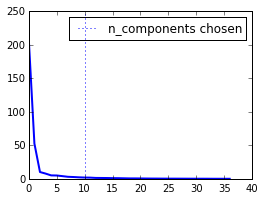

In [57]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import linear_model
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', ExtraTreesRegressor())])

pca.fit(attr)

plt.figure(1, figsize=(4,3))
plt.clf()
plt.plot(pca.explained_variance_, linewidth=2)

n_components = [5, 10, 20, 30]

estimator = GridSearchCV(pipe, 
                         dict(pca__n_components=n_components))
estimator.fit(attr, target)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))

In [59]:
test_attr0 = pca.transform(test_attr)

In [60]:
results0 = estimator.predict(test_attr0)

In [64]:
out = pd.DataFrame({'Prediction': results0})

In [66]:
out.to_csv('submission.csv')

In [ ]:
reg